# Cereal Classification Machine Learning Project
by Tushar Mittal

**Tell me what you think you deserve on this notebook given the rubric at the bottom of this page.**

I believe I should get 25/25 points. I believe that I deserve full points, because I showcased significant learning done throughout the semester. I believe that the extensive amount of time and work I put into this project is evident and should be rewarded for that. I have also followed the rubric to the best of my abilties and did not skip any parts. Additionally, I commented a lot, especially before/after visual representations so that I could allow for easier readibility/interpretability/reproducability which is important when performing experiments. Therefore, I believe I deserve 25/25 points on this project.

**Problem [2 points]: State the problem you are trying to solve with this machine learning experiment. Include a description of the data, where you got the data, and what you're trying to predict. Is the problem a regression or a classification? What kind of metric do you plan to use to measure the performance of your model?**

I decided to use a cereal dataset that I found on Kaggle: https://www.kaggle.com/datasets/crawford/80-cereals. This dataset lists out a lot of variables that define the 'Nutrition Value' as verified by the FDA on the back of cereal boxes.

Personally, I enjoy having breakfast everyday and often times am in a hurry to make something before school. So, I usually have milk & cereal and I want to see how certain cereals compare. More specifically, the problem I am trying to solve with my dataset is: I want to figure out what cereal a cereal manufacturer is likely to produce given a set of features, such as 'calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups', 'rating', and 'type'.

As listed on Kaggle, here is a slight description to the data I am dealing with -->
Name: Name of cereal, mfr: Manufacturer of cereal (A = American Home Food Products, G = General Mills, K = Kelloggs, N = Nabisco, P = Post, Q = Quaker Oats, R = Ralston Purina), type: cold or hot, calories: calories per serving, protein: grams of protein, fat: grams of fat, sodium: milligrams of sodium, fiber: grams of dietary fiber, carbo: grams of complex carbohydrates, sugars: grams of sugars, potass: milligrams of potassium, vitamins: vitamins and minerals (0, 25, or 100), shelf: display shelf (1, 2, or 3, counting from the floor), weight: weight in ounces of one serving, cups: number of cups in one serving, rating: a rating of the cereals.

Hence, I want to be able to predict which manufacturer a particular cereal is from using past data. To do so, I will split my data into a training and test set and see how accurately my model predicts the cereal manufacturer.

This is a classification problem, because my response variable (mfr) is categorical. mfr is the cereal brand that manufactures certain cereals. Since I am dealing with a classification problem, I will use accuracy metric to figure out which model is performing the best. As talked about in class, for classification problems, we want to see high accuracy. So, in my final analysis, I will look for models that gave me the highest accuracy, because that means my model did a better job at predicting the test data set from my training data set.

**Data Preparation [2 points]: Explain your data preparation. What did you have to do to get your data in shape for your experiments? Why are you certain that you data is clean and prepared for use in your algorithms?**

I was fortunate to have found a relatively clean dataset. Once I imported the dataset, the only thing I had to do was change the 'type' variable into a dummy variable so that I could use it in my model. I checked for missing values and there were none found, so I was good on that end. I am certain that my data is clean because I have checked for missing values and changed the categorical variable into a binary one so that I can use the 'type' explanatory variable in my model. I have started running code for kNN, decision trees, and random forests and they seem to be running which is a good sign that my data is clean. Now, I will be standardizing my data to make sure that I can get all my features to a common scale. This is often times seen to help improve data interpretability / accuracy. Of course, in my final analysis, I will be checking to see if standardizing helped improve model accuracy and attempt to explain the results I saw.

**Research [10 points]: Put your code and your experiments here.
Your research should include using the models that we've talked about in class so far--namely, a K Nearest Neighbors, weighted kNN, Decision Tree, Random Forest, as well as tuning these models (with visuals, i.e. graphs) to find the parameters that give you the best performance using an appropriate metric.
Does normalizing your data lead to better performance? If so, why?**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest    # feature selection from sklearn
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [4]:
path = '/content/drive/MyDrive/CS167/cereal.csv'
data = pandas.read_csv(path)

# data prep: dummies, replace, and drop missing data
data = pandas.get_dummies(data, columns=['type'])

data.dropna(inplace=True)
# Just want to make sure there is no missing data. Everything came back False,
# which means that we do not have missing data! Yay!
# print('data.shape: ', data.shape)
data.head()

predictors = ['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo',
              'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
              'rating', 'type_C', 'type_H']
target = "mfr"

train_data, test_data, train_sln, test_sln = \
    train_test_split(data[predictors], data[target], test_size = 0.2, random_state=41)

In [5]:
scaler = StandardScaler()

scaler.fit(train_data) # computes the mean and std to be used for later scaling
train_data_normalized = scaler.transform(train_data) # performs standardization by centering and scaling on the training features
test_data_normalized = scaler.transform(test_data) # performs standardization by centering and scaling on the testing features
#train_data_normalized

In [6]:
# load data first

# fit your selector just like you do when training with a classifier/regressor
# only do this after splitting into train and test sets - don't let the test
# set spoil your predictions
selector = SelectKBest(k=9)
selector.fit(train_data,train_sln)
selector.fit(train_data_normalized, train_sln)

# bigger number means the feature is more important
#print('Here are the scores of each feature:')
#print(selector.scores_)
#print(predictors)

# Hence, we want to keep fat, vitamins, weight, carbo, sugars,
# sodium, rating, type_C, and type_H because they have the top
# 8 highest scores. This means, that these features are most
# important in our data, which will most help with
# correctly producing high accuracy.


# fit it on your train data and solutions
selector.fit(train_data,train_sln)
selector.fit(train_data_normalized, train_sln)

# transform your traning data to only have the k best attributes
train_transformed = selector.transform(train_data)
train_normalized_transformed = selector.transform(train_data_normalized)

# Now we transform the predictor columns in the test set as well.
# Notice that we're using the selector that we trained using the training set.
# Do not re-fit it to the test data.
test_transformed = selector.transform(test_data)
test_normalized_transformed = selector.transform(test_data_normalized)

# Let's compare it to a model trained on k best data (k=9):
print('')
print('Comparing it to a model trained on k best data (k=9) that is Non-Weighted:')

# build a model
# Now we can use our transformed data with a classifier just like always:
clf = KNeighborsClassifier(n_neighbors = 5, weights='uniform')
clf.fit(train_transformed,train_sln)
predictions = clf.predict(test_transformed)
print('Accuracy for Non-Normalized & Non-Weighted:',accuracy_score(test_sln,predictions))

clf = KNeighborsClassifier(n_neighbors = 2, weights='uniform')
clf.fit(train_normalized_transformed,train_sln)
predictions_normalized = clf.predict(test_normalized_transformed)
print('Accuracy for Normalized & Non-Weighted:',accuracy_score(test_sln,predictions_normalized))


# Let's compare it to a model trained on all of the data:
print('')
print('Comparing it to a model trained on all of the data that is Non-Weighted:')
clf = KNeighborsClassifier(n_neighbors = 5, weights='uniform')
clf.fit(train_data,train_sln)
predictions = clf.predict(test_data)
print('Accuracy for Non-Normalized & Non-Weighted:',accuracy_score(test_sln,predictions))

clf = KNeighborsClassifier(n_neighbors = 2, weights='uniform')
clf.fit(train_data_normalized,train_sln)
predictions_normalized = clf.predict(test_data_normalized)
print('Accuracy for Normalized & Non-Weighted:',accuracy_score(test_sln,predictions_normalized))


# build a model
print('')
print('Comparing it to a model trained on k best data (k=9) that is Weighted:')

# Now we can use our transformed data with a classifier just like always:
clf = KNeighborsClassifier(n_neighbors = 5, weights='distance')
clf.fit(train_transformed,train_sln)
predictions = clf.predict(test_transformed)
print('Accuracy for Non-Normalized & Weighted:',accuracy_score(test_sln,predictions))

clf = KNeighborsClassifier(n_neighbors = 2, weights='distance')
clf.fit(train_normalized_transformed,train_sln)
predictions_normalized = clf.predict(test_normalized_transformed)

# Let's compare it to a model trained on all of the data:
print('Accuracy for Normalized & Weighted:',accuracy_score(test_sln,predictions_normalized))


# Let's compare it to a model trained on all of the data:
print('')
print('Comparing it to a model trained on all of the data that is Weighted:')

clf = KNeighborsClassifier(n_neighbors = 5, weights='distance')
clf.fit(train_data,train_sln)
predictions = clf.predict(test_data)
print('Accuracy for Non-Normalized & Weighted:',accuracy_score(test_sln,predictions))

clf = KNeighborsClassifier(n_neighbors = 2, weights='distance')
clf.fit(train_data_normalized,train_sln)
predictions_normalized = clf.predict(test_data_normalized)
print('Accuracy for Normalized & Weighted:',accuracy_score(test_sln,predictions_normalized))
print('')


Comparing it to a model trained on k best data (k=9) that is Non-Weighted:
Accuracy for Non-Normalized & Non-Weighted: 0.4375
Accuracy for Normalized & Non-Weighted: 0.375

Comparing it to a model trained on all of the data that is Non-Weighted:
Accuracy for Non-Normalized & Non-Weighted: 0.5
Accuracy for Normalized & Non-Weighted: 0.3125

Comparing it to a model trained on k best data (k=9) that is Weighted:
Accuracy for Non-Normalized & Weighted: 0.3125
Accuracy for Normalized & Weighted: 0.125

Comparing it to a model trained on all of the data that is Weighted:
Accuracy for Non-Normalized & Weighted: 0.5
Accuracy for Normalized & Weighted: 0.25



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectKBest was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectKBest was fitted without feature names
  warnings.warn(


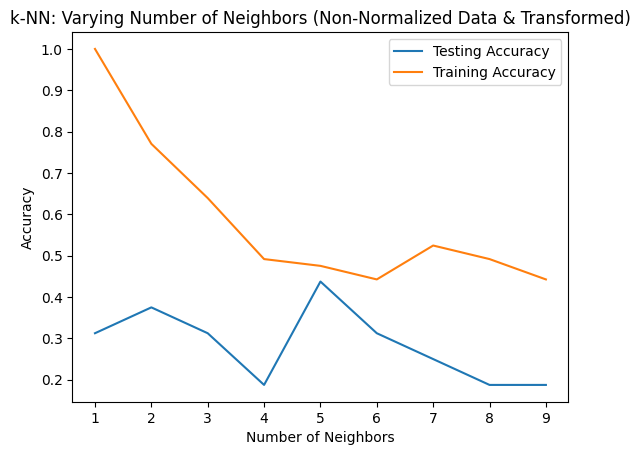

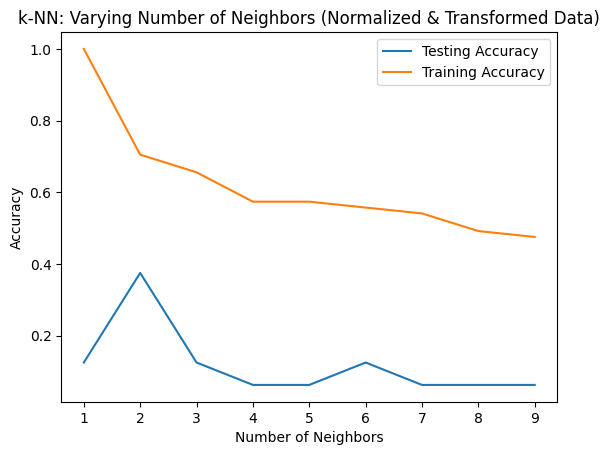

In [7]:
no_neighbors = np.arange(1, 10)
train_accuracy = np.empty(len(no_neighbors))
test_accuracy = np.empty(len(no_neighbors))

for i, k in enumerate(no_neighbors):
    # We instantiate the classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit the classifier to the training data
    knn.fit(train_transformed, train_sln)

    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(train_transformed, train_sln)

    # Compute accuracy on the testing set
    test_accuracy[i] = knn.score(test_transformed, test_sln)

# Visualization of k values vs accuracy

plt.title('k-NN: Varying Number of Neighbors (Non-Normalized Data & Transformed)')
plt.plot(no_neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(no_neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


for i, k in enumerate(no_neighbors):
    # We instantiate the classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit the classifier to the training data
    knn.fit(train_normalized_transformed, train_sln)

    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(train_normalized_transformed, train_sln)

    # Compute accuracy on the testing set
    test_accuracy[i] = knn.score(test_normalized_transformed, test_sln)

# Visualization of k values vs accuracy

plt.title('k-NN: Varying Number of Neighbors (Normalized & Transformed Data)')
plt.plot(no_neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(no_neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

accuracy score Non-Normalized:  0.625
accuracy score Normalized:  0.625


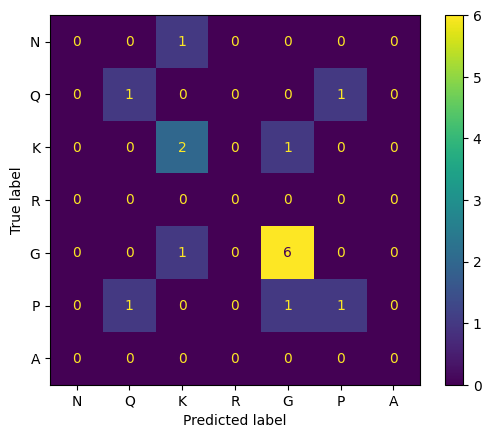

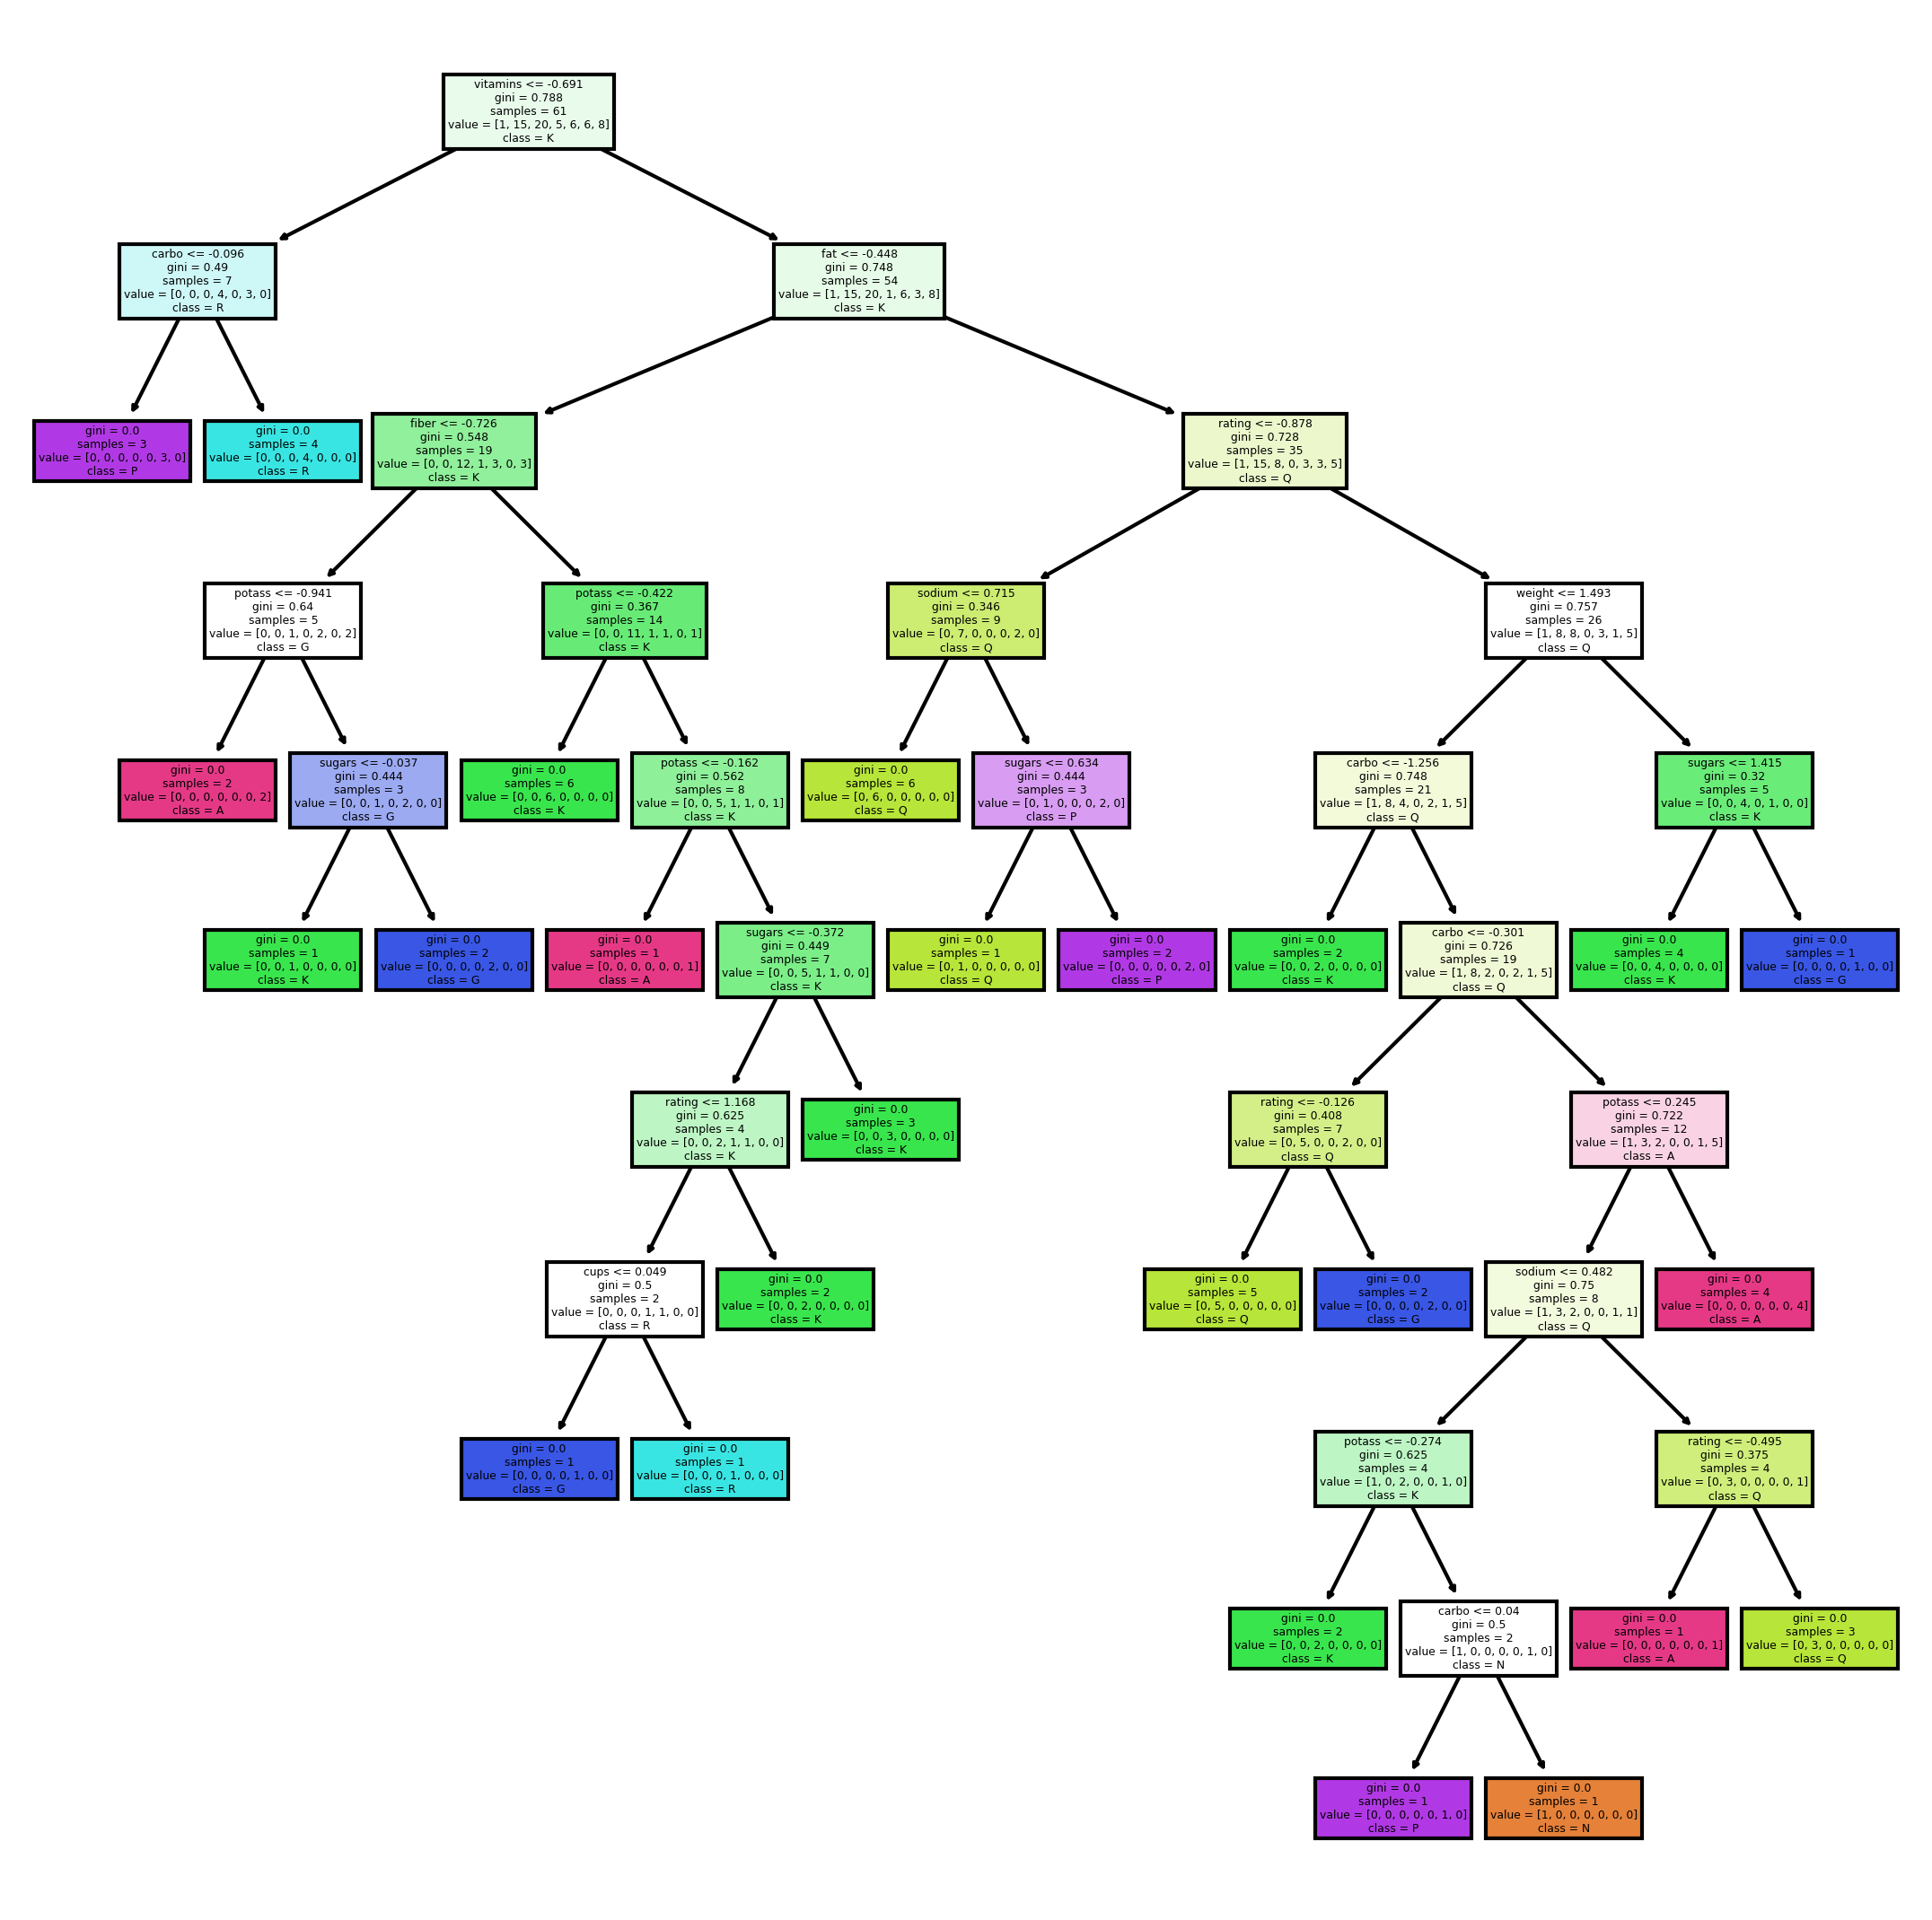

In [8]:
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Let's use a single tree for comparison
# a default Decision Tree Classifier
dt = tree.DecisionTreeClassifier(random_state = 31)
dt.fit(train_data,train_sln)
predictions = dt.predict(test_data)

dt = tree.DecisionTreeClassifier(random_state = 31)
dt.fit(train_data_normalized,train_sln)
predictions_normalized = dt.predict(test_data_normalized)

print("accuracy score Non-Normalized: ", metrics.accuracy_score(test_sln, predictions))
print("accuracy score Normalized: ", metrics.accuracy_score(test_sln, predictions_normalized))

vals = data[target].unique()
conf_mat = metrics.confusion_matrix(test_sln, predictions, labels=vals)
#print(pandas.DataFrame(conf_mat, index = "True " + vals, columns = "Predicted " + vals))

displ = ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = vals)
displ.plot()
plt.show()

#tweak paramters to make it pretty
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(9,9), dpi=300)
tree.plot_tree(dt,
               feature_names = predictors,
               class_names = vals,
               filled = True);

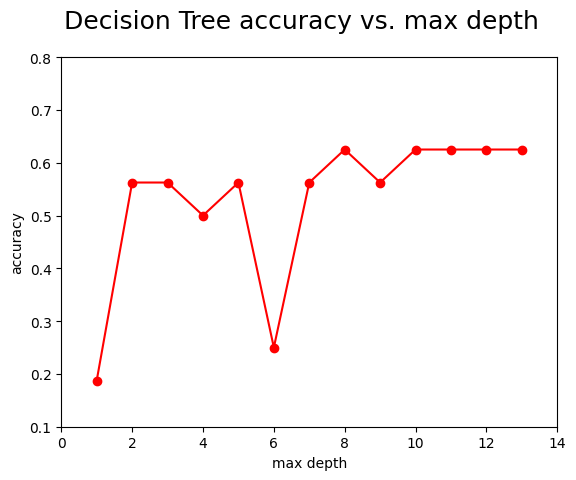

In [9]:
def tune_max_depth(max_depth_values):
    dt_accuracies = []

    for m in max_depth_values:

        curr_dt = tree.DecisionTreeClassifier(max_depth=m, random_state=31)
        curr_dt.fit(train_data,train_sln)
        curr_predictions = curr_dt.predict(test_data)
        curr_accuracy = metrics.accuracy_score(test_sln,curr_predictions)
        dt_accuracies.append(curr_accuracy)


    plt.suptitle('Decision Tree accuracy vs. max depth',fontsize=18)
    plt.xlabel('max depth')
    plt.ylabel('accuracy')
    plt.plot(max_depth_values,dt_accuracies,'ro-')
    plt.axis([0,max_depth_values[-1]+1,0.1,0.8])

    plt.show()

tune_max_depth(range(1,14))

# We see a max_depth of 8 shows highest accuracy. This is good and we want to
# try that max_depth value because we want to maximize accuracy. However, if we
# try max_depth of 2 or 3, we might see good accuracy results as well. In the
# graph, we see that max_depth of 2 or 3 shows accuracy of about 0.58,
# while max_depth of 8 shows accuracy of about 0.62. There is not significant
# difference in accuracy and I feel that after accounting for max_features,
# we might see different accuracy results. So, lets try all three of those
# max_depth values. In my final model, I will choose the max_depth that gave
# best results.

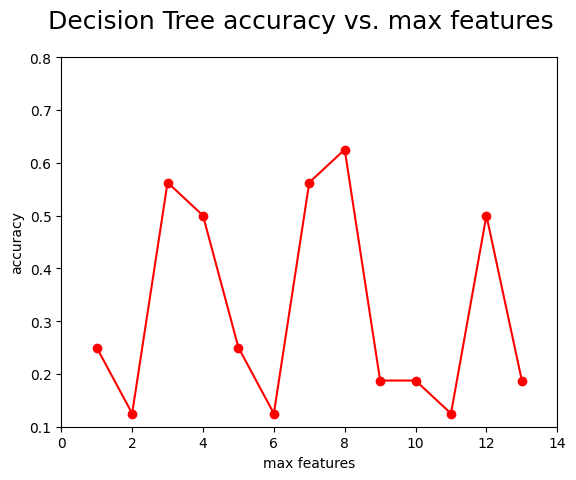

In [10]:
def tune_max_features(max_features_values):
    dt_accuracies = []

    for m in max_features_values:

        curr_dt = tree.DecisionTreeClassifier(max_depth = 3, max_features=m, random_state=31)
        curr_dt.fit(train_data,train_sln)
        curr_predictions = curr_dt.predict(test_data)
        curr_accuracy = metrics.accuracy_score(test_sln,curr_predictions)
        dt_accuracies.append(curr_accuracy)


    plt.suptitle('Decision Tree accuracy vs. max features',fontsize=18)
    plt.xlabel('max features')
    plt.ylabel('accuracy')
    plt.plot(max_features_values,dt_accuracies,'ro-')
    plt.axis([0,max_features_values[-1]+1,0.1,0.8])

    plt.show()

tune_max_features(range(1,14))

# We see that we maximize accuracy with max_features = 8, however, it
# would also be good to try max_features of 3 for the same
# reason as listed above. Let's proceed with this.

accuracy score Non-Normalized:  0.625
accuracy score Normalized:  0.625


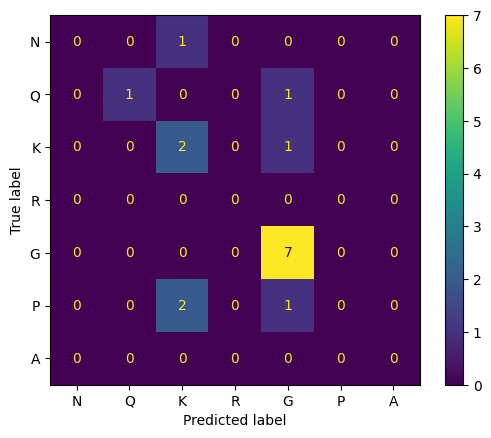


decision tree for tuned paramters: max_depth and max_features


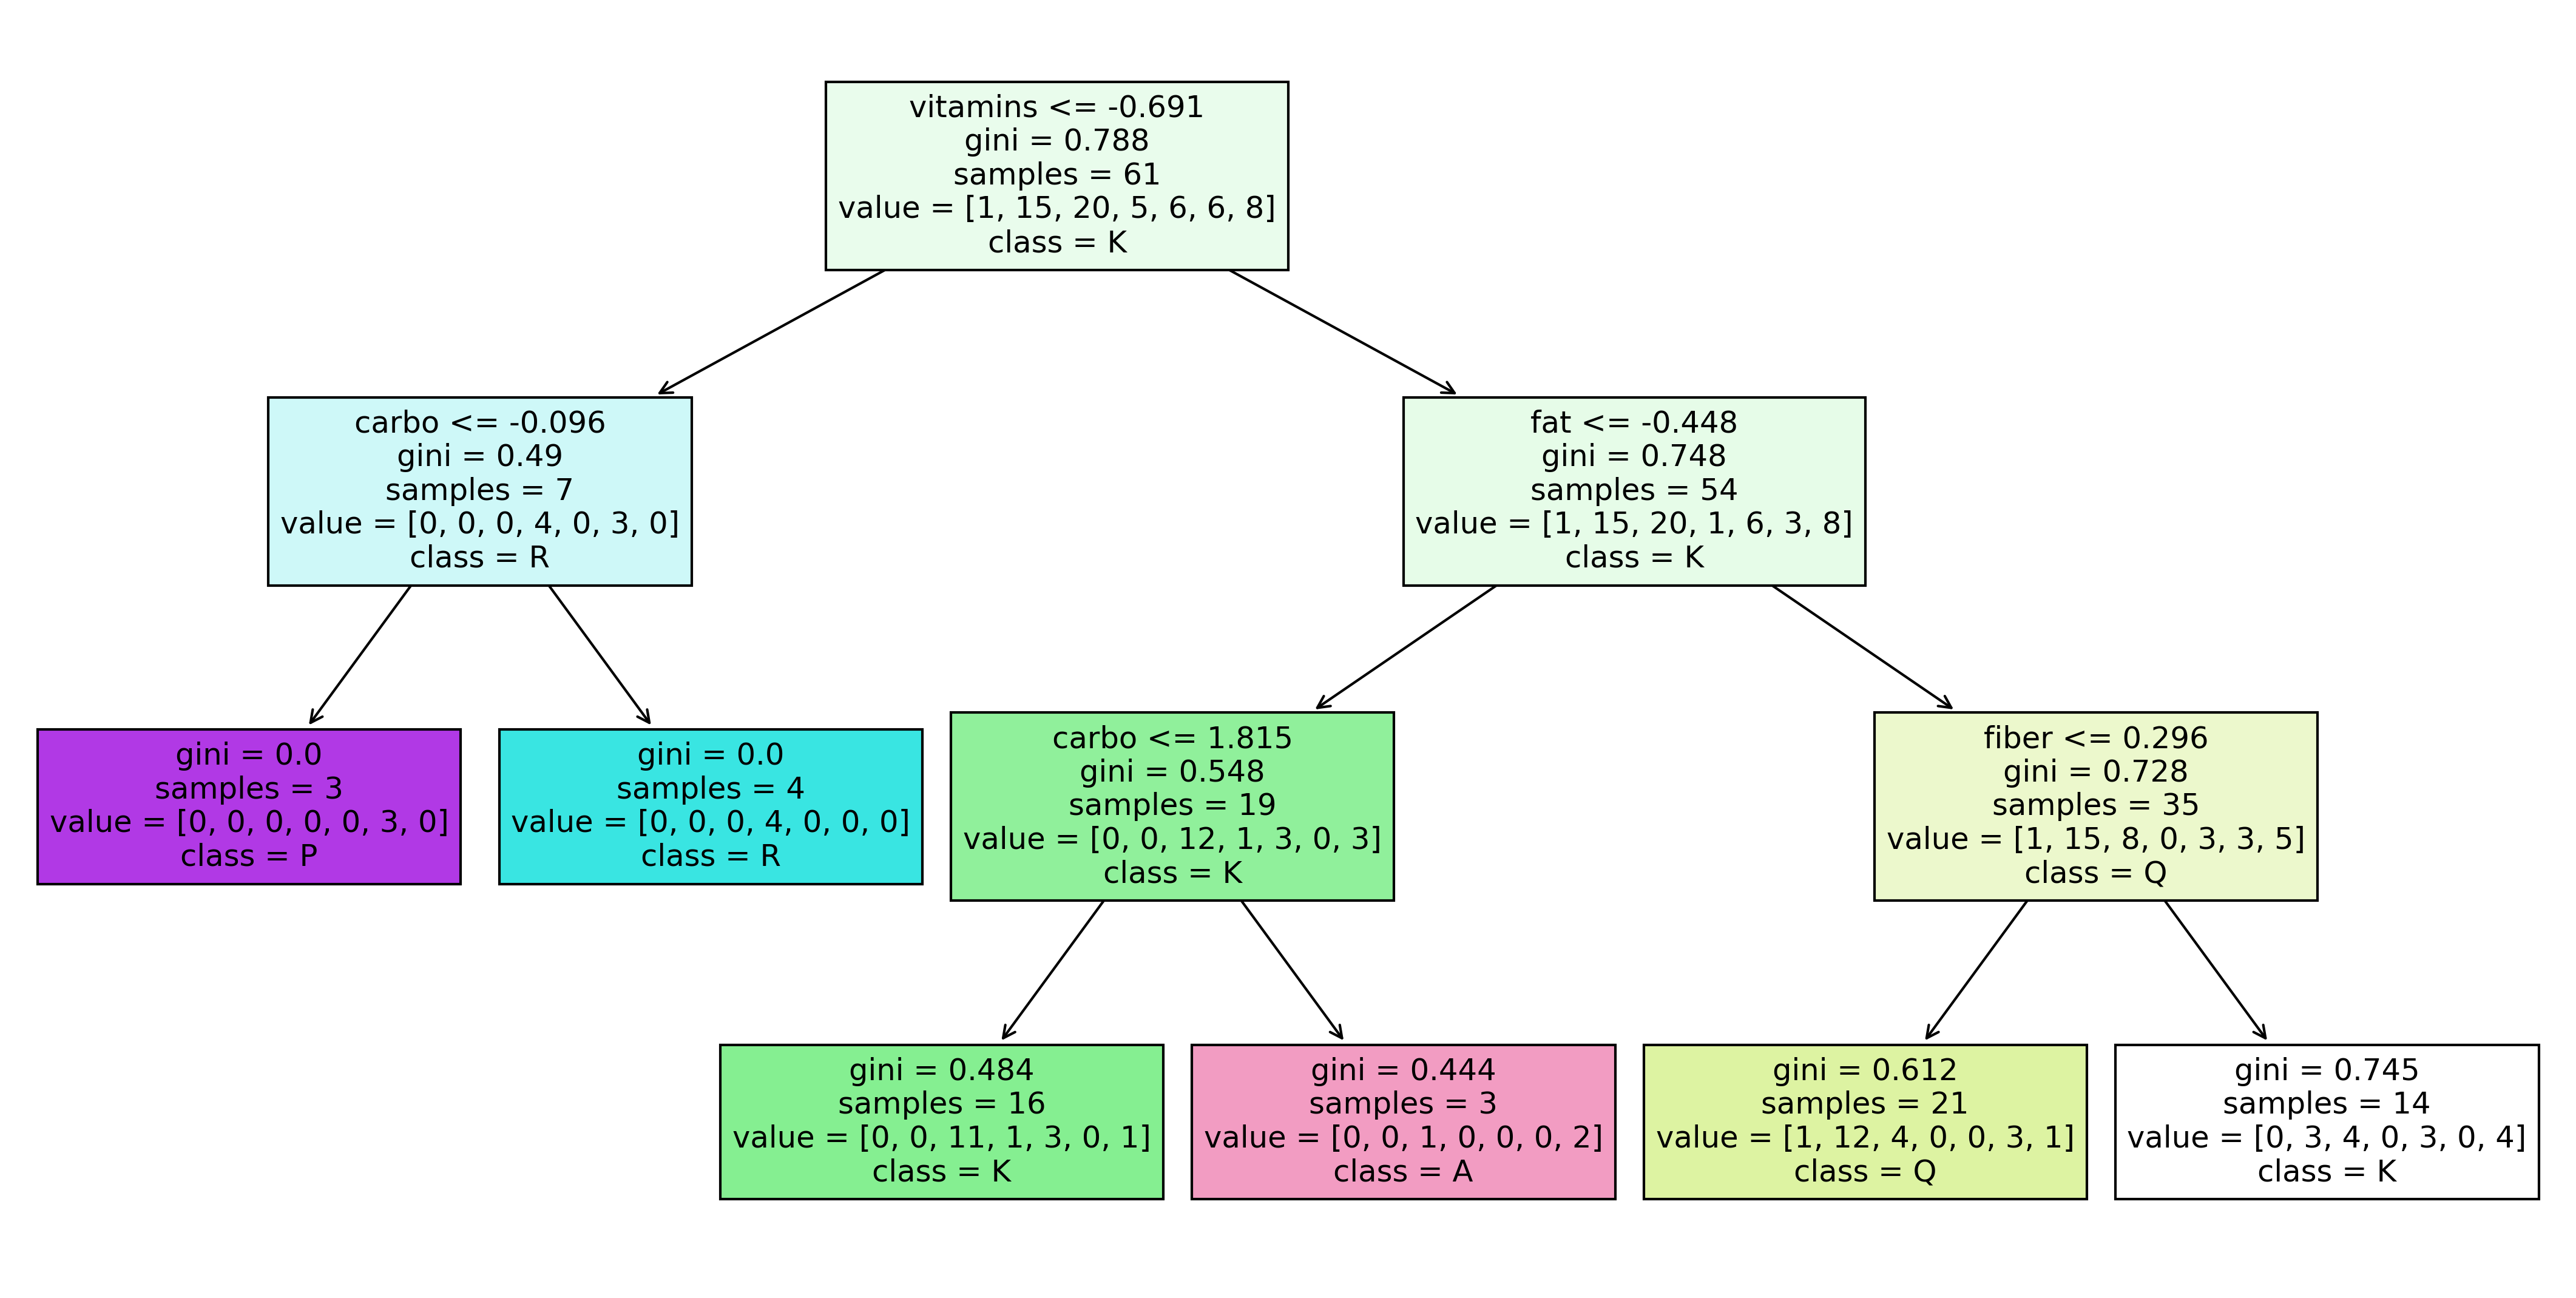

In [11]:
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Let's use a single tree for comparison
# a default Decision Tree Classifier
dt = tree.DecisionTreeClassifier(max_depth = 3, max_features = 8, random_state = 31)
dt.fit(train_data,train_sln)
predictions = dt.predict(test_data)

dt = tree.DecisionTreeClassifier(max_depth = 3, max_features = 8, random_state = 31)
dt.fit(train_data_normalized,train_sln)
predictions_normalized = dt.predict(test_data_normalized)

print("accuracy score Non-Normalized: ", metrics.accuracy_score(test_sln, predictions))
print("accuracy score Normalized: ", metrics.accuracy_score(test_sln, predictions_normalized))

vals = data[target].unique()
conf_mat = metrics.confusion_matrix(test_sln, predictions, labels=vals)
#print(pandas.DataFrame(conf_mat, index = "True " + vals, columns = "Predicted " + vals))

displ = ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = vals)
displ.plot()
plt.show()

#tweak paramters to make it pretty
print('')
print("decision tree for tuned paramters: max_depth and max_features")
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(18,9), dpi=300)
tree.plot_tree(dt,
               feature_names = predictors,
               class_names = vals,
               filled = True);

Accuracy for Non-Normalized: 0.375
Accuracy for Normalized: 0.4375


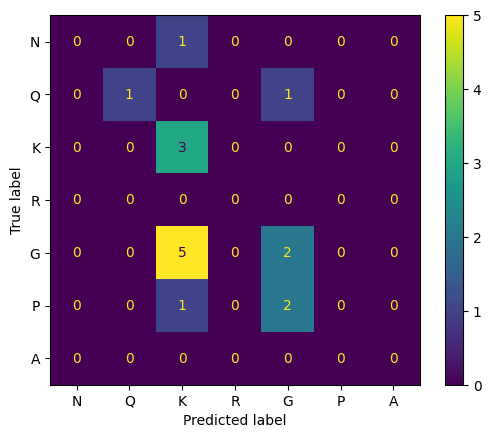

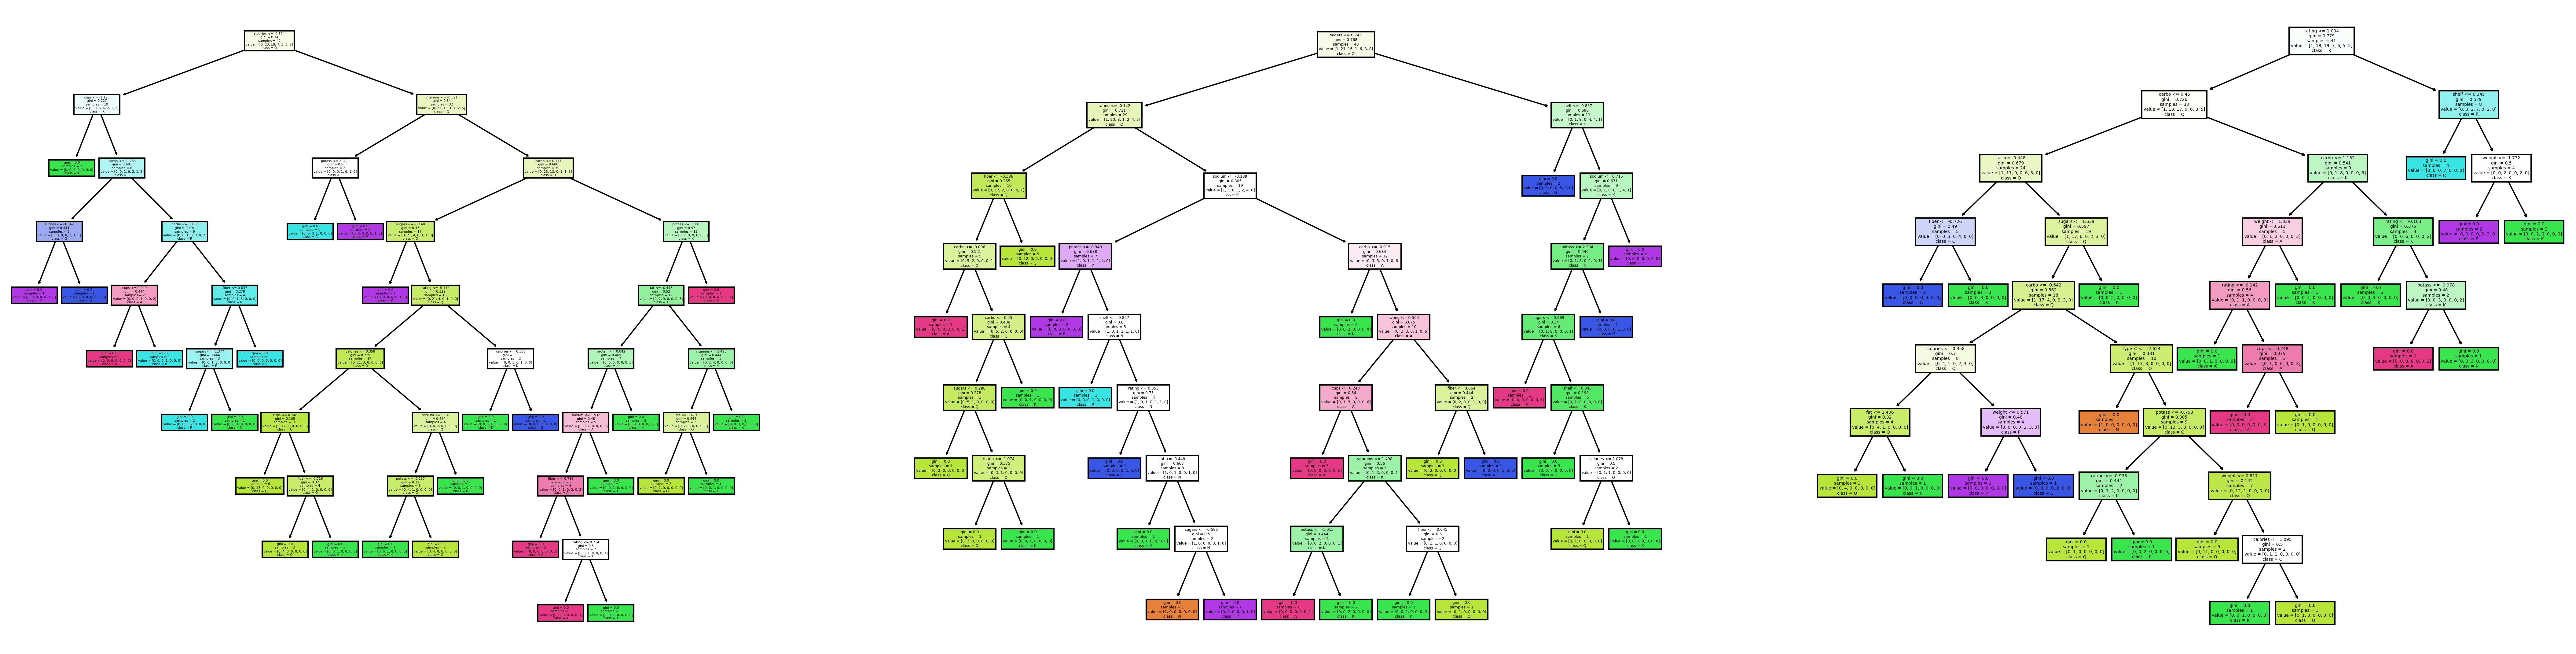

In [12]:
# a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

rf = RandomForestClassifier(random_state = 41)
rf.fit(train_data,train_sln)
predictions = rf.predict(test_data)
print('Accuracy for Non-Normalized:',accuracy_score(test_sln, predictions))

rf = RandomForestClassifier(random_state=1)
rf.fit(train_data_normalized,train_sln)
predictions_normalized = rf.predict(test_data_normalized)
print('Accuracy for Normalized:',accuracy_score(test_sln, predictions_normalized))

vals = data[target].unique()
conf_mat = metrics.confusion_matrix(test_sln, predictions, labels=vals)
#print(pandas.DataFrame(conf_mat, index = "True " + vals, columns = "Predicted " + vals))

displ = ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = vals)
displ.plot()
plt.show()


#tweak paramters to make it pretty
#The code below visualizes the first three from the random forest model fit above.
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(36,9), dpi=300)
for index in range (0, 3):
    tree.plot_tree(rf.estimators_[index],
                  feature_names = predictors,
                  class_names = vals,
                  filled = True,
                  ax = axes[index]);

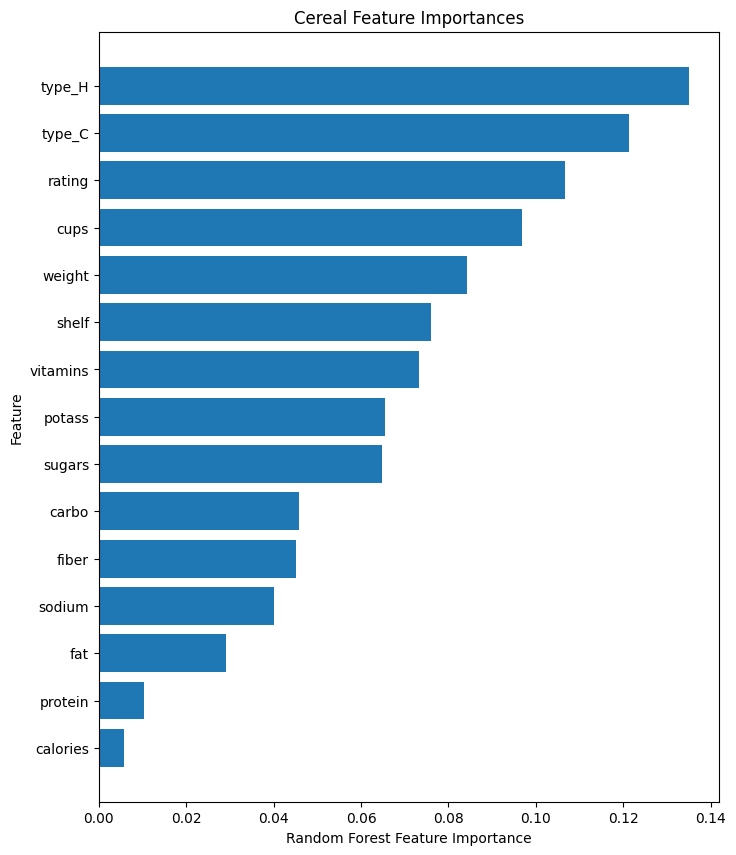

In [13]:
# It looks like our random forest model did not achieve as good accuracy as hoped.
# Our decision tree is so far winning in terms of achieving the highest accuracy.
# Now lets check how important each of the features was in the ensemble of models we built.

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#creates a list of numbers the right size to use as the index
#and sorts the list so that the most important feature are first
index = range(len(predictors))
importances = rf.feature_importances_
sorted_indices = np.argsort(importances)

plt.figure(figsize=(8,10)) #making the table a bit bigger so the text is readable
plt.title('Cereal Feature Importances')
plt.barh(range(len(sorted_indices)),importances[sorted_indices],height=0.8) #horizontal bar chart
plt.ylabel('Feature')
plt.yticks(index,predictors) #put the feature names at the y tick marks
plt.xlabel("Random Forest Feature Importance")
plt.show()


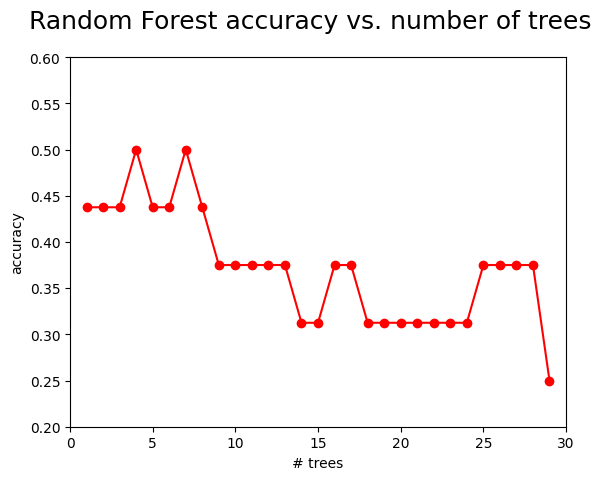

In [15]:
#This function just loops through a series of n_estimator values, builds a different model
#for each, and then plots their respective accuracies. By making it a function, it's easier
#to try out different ranges of numbers
import matplotlib.pyplot as plt

def tune_number_of_trees(n_estimator_values):
    rf_accuracies = []

    for n in n_estimator_values:

        curr_rf = RandomForestClassifier(n_estimators=n, random_state=41)
        curr_rf.fit(train_data,train_sln)
        curr_predictions = curr_rf.predict(test_data)
        curr_accuracy = metrics.accuracy_score(test_sln,curr_predictions)
        rf_accuracies.append(curr_accuracy)


    plt.suptitle('Random Forest accuracy vs. number of trees',fontsize=18)
    plt.xlabel('# trees')
    plt.ylabel('accuracy')
    plt.plot(n_estimator_values,rf_accuracies,'ro-')
    plt.axis([0,n_estimator_values[-1]+1,0.2,0.6])

    plt.show()

tune_number_of_trees(range(1,30))

# It is evident that accuracy suffers if we use a large number
# of trees. We see that the accuracy is highest at 0.50, when we
# use 4 or 7 decision trees.

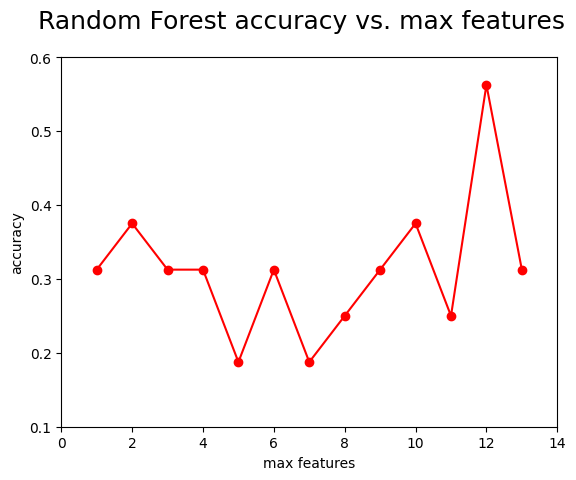

In [16]:
def tune_max_features(max_features_values):
    rf_accuracies = []

    for m in max_features_values:

        curr_rf = RandomForestClassifier(n_estimators=4,max_features=m, random_state=31)
        curr_rf.fit(train_data,train_sln)
        curr_predictions = curr_rf.predict(test_data)
        curr_accuracy = metrics.accuracy_score(test_sln,curr_predictions)
        rf_accuracies.append(curr_accuracy)


    plt.suptitle('Random Forest accuracy vs. max features',fontsize=18)
    plt.xlabel('max features')
    plt.ylabel('accuracy')
    plt.plot(max_features_values,rf_accuracies,'ro-')
    plt.axis([0,max_features_values[-1]+1,0.1,0.6])

    plt.show()

tune_max_features(range(1,14))

# We see the highest accuracy of around 0.57 when we use n_estimators = 4.
# I also tried this for n_estimators = 7, but it did not yield as high of
# accuracy results, so I will proceed with n_estimators = 4 and
# max_features = 12.

accuracy for Non-Normalized:  0.5625
accuracy for Normalized: 0.5625


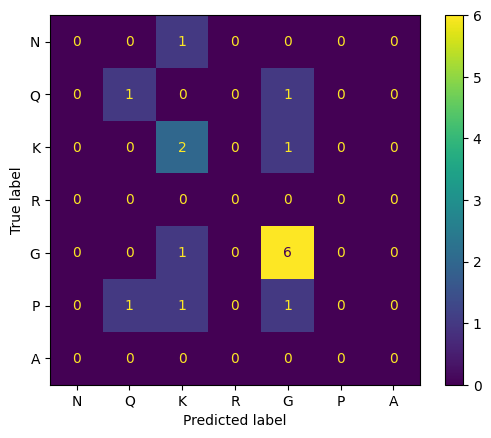

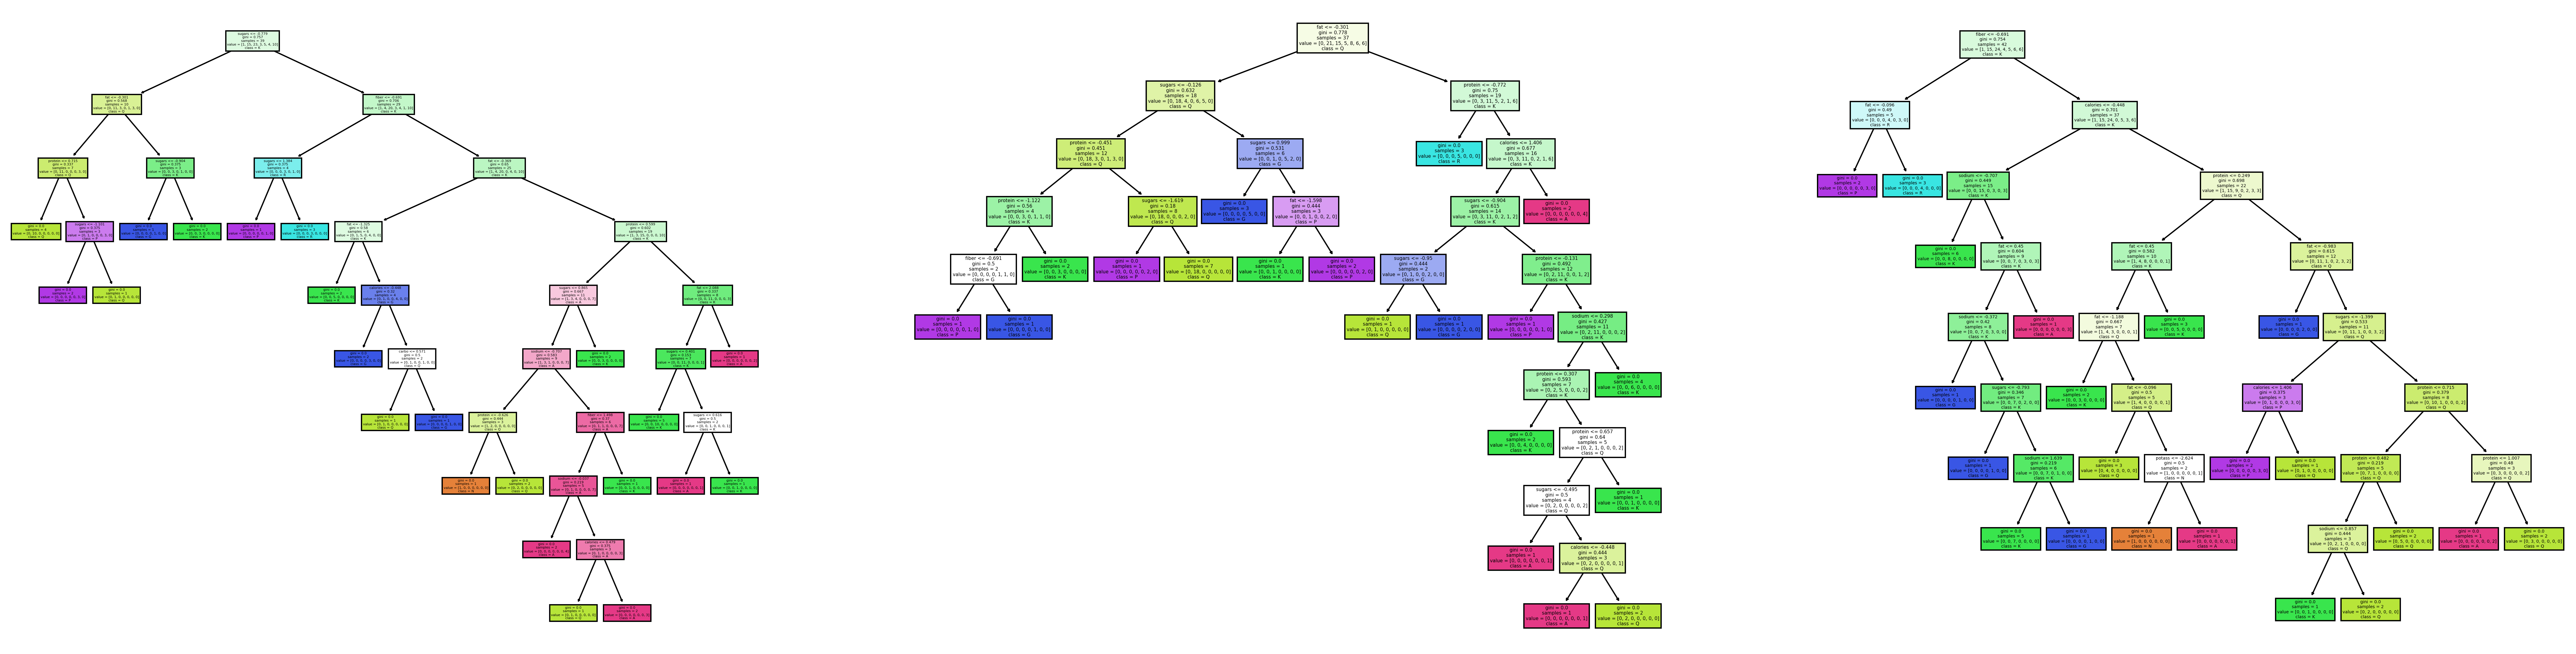

In [20]:
# transform your training data to only have the k best attributes

# I chose n_estimators as 7, because that produced better results than having it set
# at 4. In the graph displayed above, I came up with n_estimators has to be 4 or
# 7 because that produced the best accuracy for the random forest. However, with
# max_features accounted for, n_estimators = 7 performs better.

rf = RandomForestClassifier(n_estimators = 4, max_features = 12, random_state = 42)
rf.fit(train_transformed, train_sln)
predictions = rf.predict(test_transformed)
acc = accuracy_score(test_sln, predictions)
print('accuracy for Non-Normalized: ', acc)

rf = RandomForestClassifier(n_estimators = 4, max_features = 12, random_state = 42)
rf.fit(train_normalized_transformed,train_sln)
predictions_normalized = rf.predict(test_normalized_transformed)
print('accuracy for Normalized:',accuracy_score(test_sln, predictions_normalized))

vals = data[target].unique()
conf_mat = metrics.confusion_matrix(test_sln, predictions, labels=vals)
#print(pandas.DataFrame(conf_mat, index = "True " + vals, columns = "Predicted " + vals))

displ = ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = vals)
displ.plot()
plt.show()


#tweak paramters to make it pretty
#The code below visualizes the first three from the random forest model fit above.
# random forest for tuned parameters: n_estimators and max_features

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(36,9), dpi=300)
for index in range (0, 3):
    tree.plot_tree(rf.estimators_[index],
                  feature_names = predictors,
                  class_names = vals,
                  filled = True,
                  ax = axes[index]);

**For the *kNN*, here are the results I got:**

Comparing it to a model trained on all of the data that is *Non-Weighted*:
*   Accuracy for Non-Normalized: 0.5
*   Accuracy for Normalized: 0.3125

Comparing it to a model trained on k best data (k=9) that is *Non-Weighted and Parameter Tuned*:
*   Accuracy for Non-Normalized: 0.4375
*   Accuracy for Normalized: 0.375

**For the *w-kNN*, here are the results I got:**

Comparing it to a model trained on all of the data that is *Weighted*:
*   Accuracy for Non-Normalized: 0.5
*   Accuracy for Normalized: 0.25

Comparing it to a model trained on k best data (k=9) that is *Weighted and Parameter Tuned*:
*   Accuracy for Non-Normalized: 0.3125
*   Accuracy for Normalized: 0.125

**For the *decision tree*, I got the same results (*before parameter tuning and after parameter tuning*):**
*   accuracy score Non-Normalized:  0.625
*   accuracy score Normalized:  0.625

**For the *random forest*, here are the results I got:**

*Before parameter tuning*:
*   Accuracy for Non-Normalized: 0.375
*   Accuracy for Normalized: 0.4375

*After parameter tuning* are:
*   accuracy for Non-Normalized:  0.5625
*   accuracy for Normalized: 0.5625
** **
**Does normalizing your data lead to better performance? If so, why?**

For the kNN and w-kNN, normalizing did not help. However, for decision tree and random forests, normalizing did not worsen our accuracy. For random forest, our accuracy actually got better after normalizing (before parameter tuning). I believe I saw these unconventional results because of the size of data. We only had 77 rows, which is not a large dataset. On top of that, when we split the data into training and test sets, our data had even less to build off of. This is why I kept the test size of my data to 0.2, because any larger, then my model saw significant change in accuracy results (for the worse). However, I also wanted to make sure my model had enough of a test size to be able to make accurate predictions and not overfit the model.

**Analysis [10 points]: What did you discover? What insights/recommendations do you have? What did you find that was interesting? Which model was your best model, which models didn't work well? Why do you think this is? In general, I want a discussion of your experiment, the results, and what they mean.**

I discovered that my decision tree performed the best with an accuracy score of 0.625. It performed the same for normalized, non-normalized, and parameter tuned. Second best performing was my random forest, with a slightly lower accuracy of 0.5625 for normalized and non-normalized after parameter tuning. When dealing with classification, we want the highest accuracies. So, I would recommend that we go ahead with the decision tree model and use that to predict future cereal manufacturers. As mentioned earlier the kNN and w-kNN did not perform too great. The results I got were off, because the dataset is quite small (with only 77 rows). I believe this was the reason why my normalized data did not always give better accuracy. If I had a large enough dataset, normalization typically gives better results because it rescales attribute values so that they are about the same and adjusts values measured on different scales to a common scale. I find that my decision tree performing better than my random forest quite interesting. This is because random forests typically perform better than decision trees since they are made up of many decision trees as opposed to just one, which prevents overfitting and gives better results (higher accuracies). However, this was not the case with my dataset. I believe that my decision tree performed better perhaps due to the pruning I did and the way I went about it. Also, my dataset was too small to build a highly accurate model off of. Overall, my experiment consisted of getting the accuracies for normalized and non-normalized data and I also tuned my parameters to see if that would give higher accuracies. I did so by setting a training set (comprised of 80% of data) and a test set (comprised of 20% of data). I built my model off of the training set and used that model to see if it could accurately predict the test set. With how accuracy works, my model checked how many times my model predicted correctly out of the total and that resulted in recieving model accuracy. Overall, I am pleased with my findings because I had 7 cereal manufacturers that could have been predicted: American Home Food Products, General Mills, Kelloggs, Nabisco, Post, Quaker Oats, and Ralston Purina. If I were to have guessed a random cereal manufacturer, I would have had a 1/7 = 0.14 chance of predicting the correct cereal manufacturer. However, my models (all of them) performed better than that. My final model, had an accuracy of 0.625! That is much more accurate at predicting the cereal manufacturer than a random guess by a factor of 4.4! That is great and is something better than I started off with, which is always a good thing. So, I consider that this experiment was a success and I can use my decision tree to predict cereal manufacturer. As a note, since all my decision trees gave same accuracies, I will go ahead with the normalized and paramter tuned decision tree. I want to use that decision tree, because if data is added to the dataset (in the future), I believe it should yield better accuracies. I think it should yield better results, because normalized datset is often seen to be better than non-normalized because it scales values to a common scale (as mentioned earlier). Also, the parameter tuning seems to be making the decision tree more parsimonious (simple), which will prevent our model from trying to overpredict. Of course, as a safety measure, I would run all my models on the new datset to see if this holds true (this is a good idea for a new experiment design).

**Bumps in the Road [1 point]: What challenges did you encounter? How did you overcome these challenges?**

Some bumps in the road I faced were:
*   Understanding why normalizing was not helping improve accuracy. After analysis, I realized that the small dataset size was leading to this. There was not enough observations for my model to build off of. I overcame this challenge by evaluating my code (to see if I went wrong somewhere), then I started tracing my steps back. This led me to the dataset and I saw where the problem had arisen from. I am glad to have figured out that the problem had stemmed from the dataset being too small.
*   I did not understand why kNN and w-kNN were performing so poorly, but that was something that my previous question answered. The model size is quite an important factor to acknolowdge when doing data analysis. This experience has taught me that I need to be more mindful of not just the code, but the data as a whole. Understanding the basics can help lead to solving any problems dealt with in code analysis.